# Incêndios e Área desmatada na Amazônia

> ### Hipótese:
> Incêndios são um fator relevante no desmatamento da Amazônia

![incendios](./dados/incendios.jpg)

## 1. Conjuntos de dados
### 1.1. Desmatamento
* Programa [DETER](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/deter)
* Programa [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)

http://terrabrasilis.dpi.inpe.br/en/home-page/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

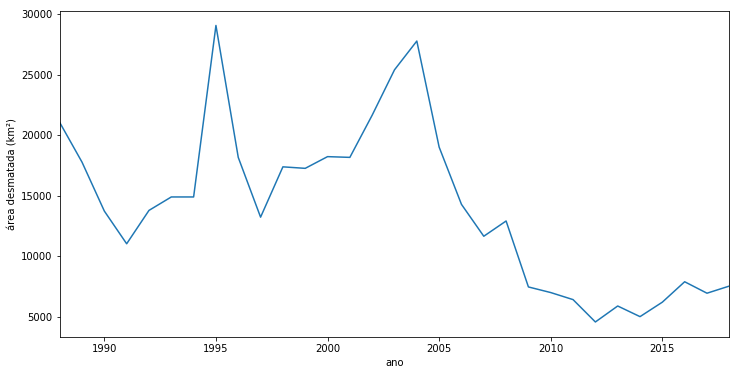

In [2]:
df_prodes = pd.read_csv("./dados/taxa_desmatamento_prodes.csv")
df_prodes = df_prodes.pivot_table(values="area", index="ano", columns="uf")
df_prodes["desmatamento"] = df_prodes.sum(axis=1)
ax = plt.axes()
ax.set_ylabel("área desmatada (km²)")
df_prodes["desmatamento"].plot(figsize=(12, 6), ax=ax)

 ### 2004 - [Plano de Ação para Prevenção e Controle do Desmatamento na Amazônia Legal (PPCDAm)](http://redd.mma.gov.br/pt/acompanhamento-e-a-analise-de-impacto-das-politicas-publicas/ppcdam)
 
![title](dados/PPCDAm.jpg)

### 1.2. Incêndios
* [INPE](http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/)

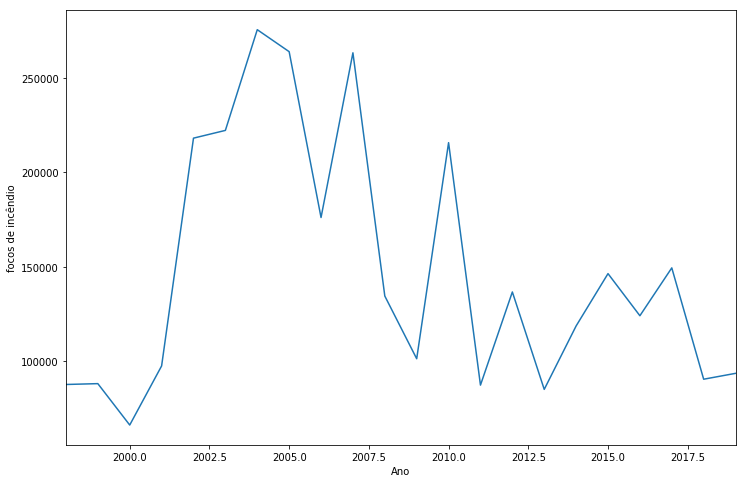

In [3]:
df_incendios = pd.read_csv("./dados/incendios_amazonia.csv")
df_incendios = df_incendios.set_index("Ano").rename(columns={"Total": "incendios"})
df_incendios
df_incendios["incendios"] = df_incendios["incendios"].astype(int)
ax = plt.axes()
ax.set_ylabel("focos de incêndio")
df_incendios["incendios"].plot(figsize=(12, 8), ax=ax)

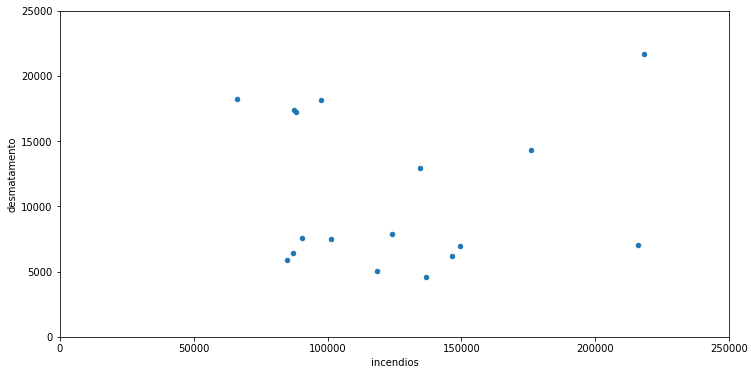

In [4]:
df = df_prodes[["desmatamento"]].join(df_incendios[["incendios"]]).dropna().astype(int)
df.plot.scatter("incendios", "desmatamento", figsize=(12, 6), xlim=(0, 250000), ylim=(0, 25000))

## 2. Regressão Linear com SciPy
### \begin{align}
y & = \alpha + \beta X +\epsilon \\
y & = \alpha + (\beta_0 x_0 + \beta_1 x_1 + ... + \beta_n x_n) +\epsilon\\
\end{align}

#### Caso 2D:
### \begin{align}
y & = a + bx\\
y & = intercept + slope.x\\
\end{align}

Vamos calcular a inclinação e o ponto de interceptação usando a biblioteca `SciPy` usando a função `linregress`

In [5]:
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

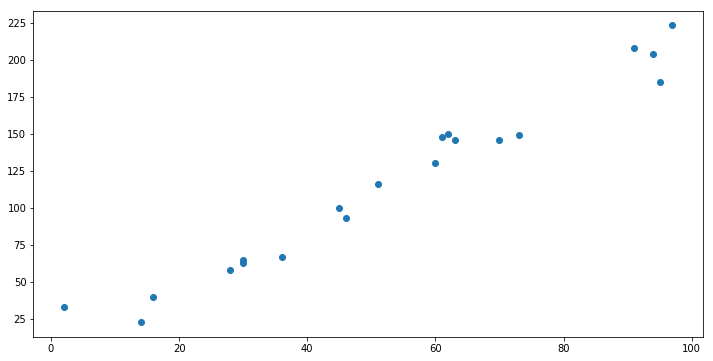

In [6]:
np.random.seed(666)
beta = 2
alpha = 10
eta = 20
X = sorted(np.random.randint(0, 100, 20))
Y = [alpha + beta*x + np.random.randint(-eta, eta) for x in X]
fig = plt.figure(figsize=(12,6))
plt.scatter(X, Y)

slope: 2.110234480607258 intercept: 5.085525631693855 r^2: 0.9661597340405004


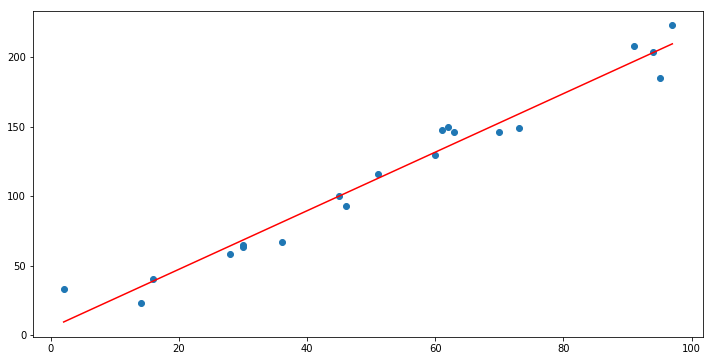

In [7]:
def line(slope, intercept, X):
    return np.add(np.multiply(slope, X), intercept)

slope, intercept, r_value, p_value, std_err = linregress(X, Y)
print("slope:", slope, "intercept:", intercept, "r^2:", r_value**2)
fig = plt.figure(figsize=(12,6))
plt.scatter(X, Y)
plt.plot(X, line(slope, intercept, X), color="red")

#### R² => Coeficiente de determinação

slope: 3.1859299662106575 intercept: -53.75881117199657 r^2: 0.8048604265103819


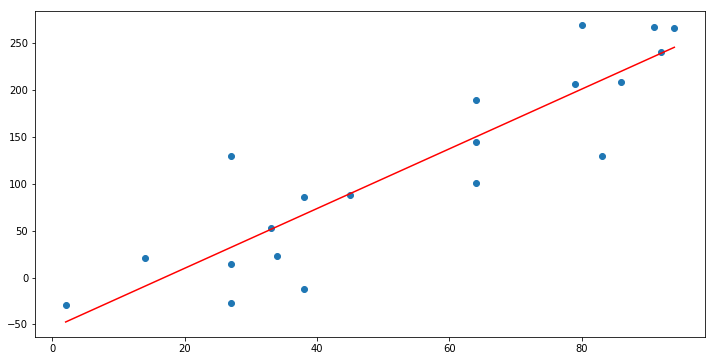

In [8]:
beta = 2
alpha = 10
eta = 100
X = sorted(np.random.randint(0, 100, 20))
Y = [alpha + beta*x + np.random.randint(-eta, eta) for x in X]

slope, intercept, r_value, p_value, std_err = linregress(X, Y)
print("slope:", slope, "intercept:", intercept, "r^2:", r_value**2)
fig = plt.figure(figsize=(12,6))
plt.scatter(X, Y)
plt.plot(X, line(slope, intercept, X), color="red")

slope: 0.05458767059460501 intercept: 43.41242831968056 r^2: 0.0035152910325454596


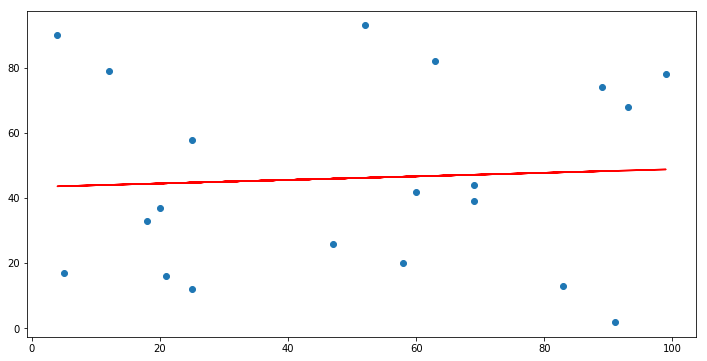

In [9]:
X = np.random.randint(0, 100, 20)
Y = np.random.randint(0, 100, 20)

slope, intercept, r_value, p_value, std_err = linregress(X, Y)
print("slope:", slope, "intercept:", intercept, "r^2:", r_value**2)
fig = plt.figure(figsize=(12,6))
plt.scatter(X, Y)
plt.plot(X, line(slope, intercept, X), color="red")

## 3. Mínimos Quadrados

### 3.1. Residual
### \begin{equation*}
R^2  = \sum{y_i - f(x_i)} \\
f(x)  = \alpha + \beta x
\end{equation*}

Para minimizar o residual:
### \begin{equation*}
\frac{d(R^2)}{d\alpha} = 0\\
\frac{d(R^2)}{d\beta} = 0\\
\end{equation*}

Portanto:
### \begin{equation*}

-2\sum _{i}r_{i}{\frac  {\partial f(x_{i},{\boldsymbol  \beta })}{\partial \beta _{j}}}=0,\ j=1,\ldots ,m.
\end{equation*}

In [22]:
np.dot(1/np.dot(df["incendios"], df["incendios"]) * df["incendios"], df["desmatamento"])

0.0792212835349546

## 4. Aplicando regressão linear no dataset:

slope: 0.04723268854698546 intercept: 5712.167339510731 r^2: 0.19909746634361938


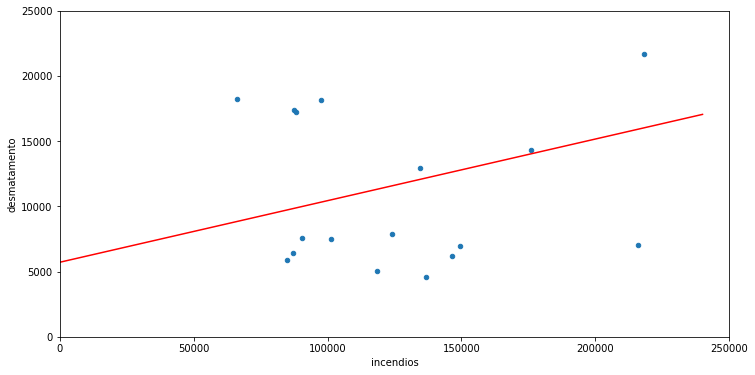

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(df["incendios"].values.reshape(1, -1), df["desmatamento"].values.reshape(1, -1))
print("slope:", slope, "intercept:", intercept, "r^2:", r_value**2)
ax = plt.axes()
X = np.array(range(0, 250000, 10000))
Y = line(slope, intercept, X)
ax.plot(X, Y, color="red")
df.plot.scatter("incendios", "desmatamento", figsize=(12, 6), xlim=(0, 250000), ylim=(0, 25000), ax=ax)

> ### ~20% do desmatamento na Amazônia Legal pode ser explicado pelas queimadas